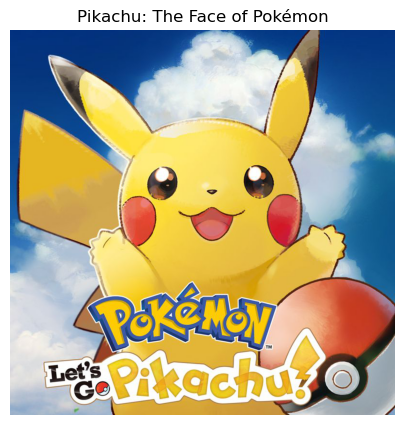

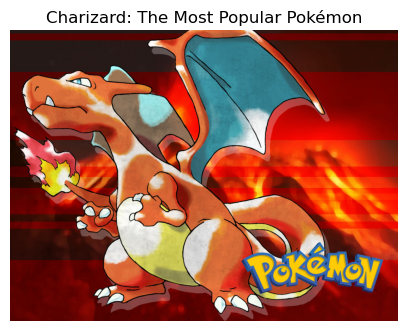

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# displaying images
switch = "resources/ns.jpg" #https://collider.com/most-popular-pokemon-characters-ranked/
gameboy = "resources/gb.jpg" #https://bulbapedia.bulbagarden.net/wiki/Pok%C3%A9mon_of_the_Year

plt.figure(figsize=(5, 5))
electric = mpimg.imread(switch)
plt.imshow(electric)
plt.axis("off")
plt.title("Pikachu: The Face of Pokémon")
plt.show()

plt.figure(figsize=(5, 5))
fire = mpimg.imread(gameboy)
plt.imshow(fire)
plt.axis("off")
plt.title("Charizard: The Most Popular Pokémon")
plt.show()

In [23]:
# importing necessary libraries
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# defining the pokeAPI class
class PokeAPI:
    BASE_URL = "https://pokeapi.co/api/v2/"
    
    # constructor
    def __init__(self):
        pass

    # method to fetch data for a given pokemon
    def get_pokemon_data(self, name_or_id):
        url = f"{self.BASE_URL}pokemon/{name_or_id}"
        try:
            response = requests.get(url)
            response.raise_for_status()
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"Error fetching data: {e}")
            return None

    # method to extract base stats
    def extract_pokemon_stats(self, pokemon_data):
        if pokemon_data:
            stats = {stat['stat']['name']: stat['base_stat'] for stat in pokemon_data['stats']}
            return stats
        return None

In [24]:
# function to visualize stats
def visualize_stats(pokemon_name, stats, title_color, bar_color):
    if stats:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=list(stats.keys()), y=list(stats.values()), palette=[bar_color])
        plt.title(f"{pokemon_name.capitalize()}'s Stats", fontsize=16, color=title_color)
        plt.xlabel("Stat", fontsize=12)
        plt.ylabel("Base Stat Value", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.grid(axis="y", linestyle="--", alpha=0.6)
        plt.show()

# initializing pokeAPI
api = PokeAPI()

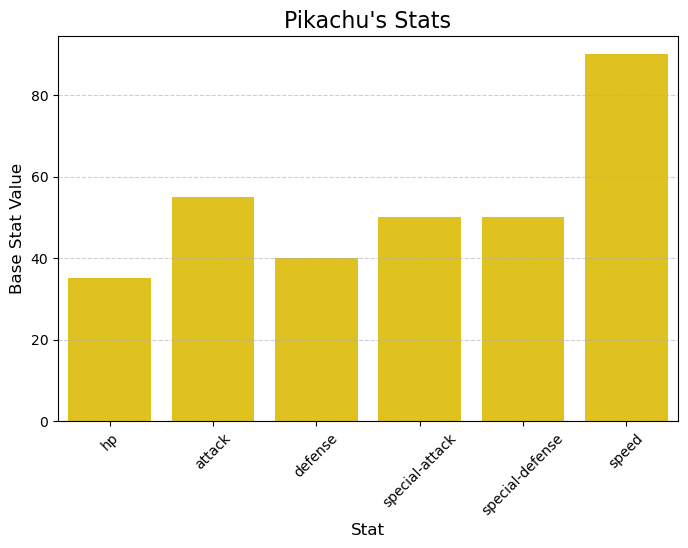

In [25]:
# fetching pikachu's data
pikachu_data = api.get_pokemon_data("pikachu")
pikachu_stats = api.extract_pokemon_stats(pikachu_data)

# visualizing pikachu's stats
visualize_stats("Pikachu", pikachu_stats, title_color="black", bar_color="gold")

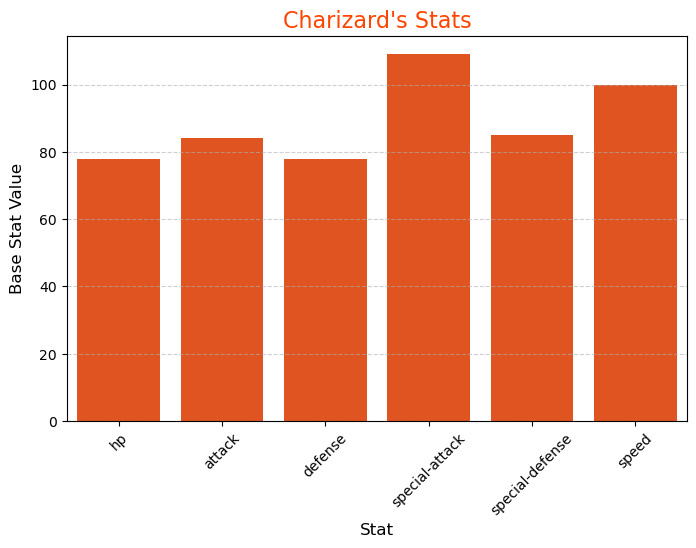

In [26]:
# fetching charizard's data
charizard_data = api.get_pokemon_data("charizard")
charizard_stats = api.extract_pokemon_stats(charizard_data)

# visualizing charizard's stats
visualize_stats("Charizard", charizard_stats, title_color="orangered", bar_color="orangered")

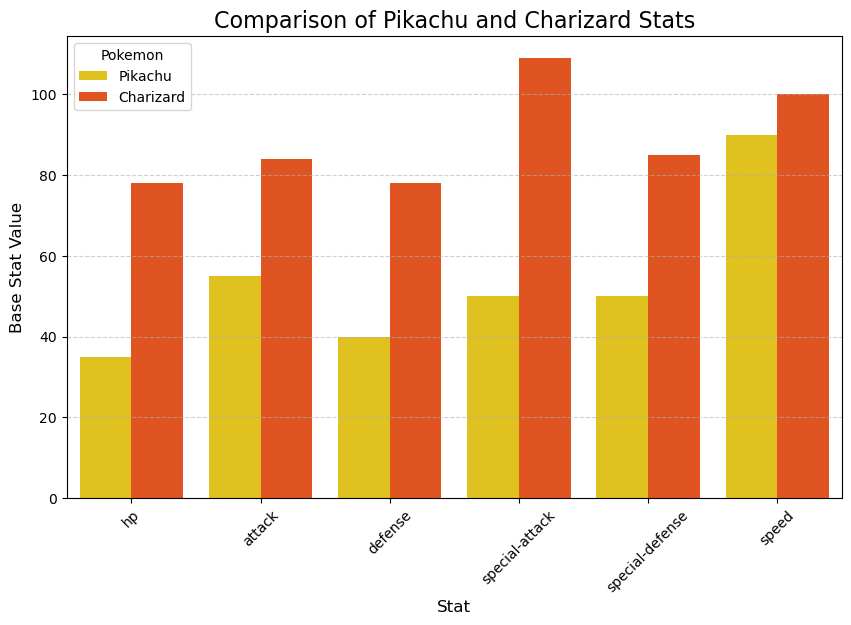

In [27]:
# comparing stats
def compare_pokemon_stats(pikachu_stats, charizard_stats):
    df = pd.DataFrame({
        "Stat": list(pikachu_stats.keys()),
        "Pikachu": list(pikachu_stats.values()),
        "Charizard": list(charizard_stats.values())
    })

    df = df.melt(id_vars="Stat", var_name="Pokemon", value_name="Base Stat")
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="Stat", y="Base Stat", hue="Pokemon", palette=["gold", "orangered"])
    plt.title("Comparison of Pikachu and Charizard Stats", fontsize=16)
    plt.xlabel("Stat", fontsize=12)
    plt.ylabel("Base Stat Value", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(title="Pokemon")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

# creating a comparison chart of the two pokemon who garner popular attention till today
compare_pokemon_stats(pikachu_stats, charizard_stats)

In [28]:
# creating a dictionary of pokemon types and their corresponding colors
pokemon_type_colors = {
    "normal": "#A8A77A",  # Grayish
    "fire": "#EE8130",    # Orange-red
    "water": "#6390F0",   # Blue
    "grass": "#7AC74C",   # Green
    "electric": "#F7D02C", # Yellow
    "psychic": "#F95587",  # Pink
    "ice": "#96D9D6",     # Light blue
    "fighting": "#C22E28", # Reddish-brown
    "poison": "#A33EA1",  # Purple
    "ground": "#E2BF65",  # Brown
    "flying": "#A98FF3",  # Light purple
    "bug": "#A6B91A",     # Greenish-yellow
    "rock": "#B6A136",    # Dark yellow
    "ghost": "#735797",   # Dark purple
    "dragon": "#6F35FC",  # Purple-blue
    "steel": "#B7B7CE",   # Light gray
    "dark": "#705746",    # Dark brown
    "fairy": "#D685AD",   # Pinkish-purple
}

# getting pokemon name from user input
def get_pokemon_name():
    # entering pokemon name
    while True:
        pokemon_name = input("Enter a Pokemon name (or 'q' to quit): ").lower()
        # checking for quit condition
        if pokemon_name == 'q':
            break
        return pokemon_name

# looping for multiple pokemon visualization
while True:
    pokemon_name = get_pokemon_name()
    # checking if pokemon name is valid
    if not pokemon_name:
        break

    # fetching pokemon data
    pokemon_data = api.get_pokemon_data(pokemon_name)

    # checking if data was retrieved successfully
    if pokemon_data:
        # extracting pokemon stats
        pokemon_stats = api.extract_pokemon_stats(pokemon_data)
        types = [t['type']['name'] for t in pokemon_data['types']]

        # choosing color based on pokemon type(s)
        if types:
            bar_color = pokemon_type_colors.get(types[0], "gray")  # Use first type or gray if not found
            if len(types) > 1:
                title_color = pokemon_type_colors.get(types[1],"black")
            else:
                title_color = pokemon_type_colors.get(types[0],"black")
        else:
            bar_color = "gray"
            title_color = "black"

        # visualizing pokemon's stats
        visualize_stats(pokemon_name.capitalize(), pokemon_stats, title_color, bar_color)
    else:
        # printing error message if data not found
        print(f"Sorry, couldn't find data for '{pokemon_name}'.")

# printing completion message
print("Done visualizing Pokemon stats!")

Done visualizing Pokemon stats!
